In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dccha\.cache\kagglehub\datasets\sumanthvrao\daily-climate-time-series-data\versions\3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [84]:
dataset_path = os.path.join(path, "DailyDelhiClimateTrain.csv")
print("The dataset is stored in : ",dataset_path)

The dataset is stored in :  C:\Users\dccha\.cache\kagglehub\datasets\sumanthvrao\daily-climate-time-series-data\versions\3\DailyDelhiClimateTrain.csv


# Load the dataset

In [85]:
# Training dataset loaded
df = pd.read_csv(dataset_path)
df.head(6)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000


In [86]:
# Testing dataset loading
df_test = pd.read_csv(os.path.join(path, "DailyDelhiClimateTest.csv"))
df_test.head(6)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727


In [87]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


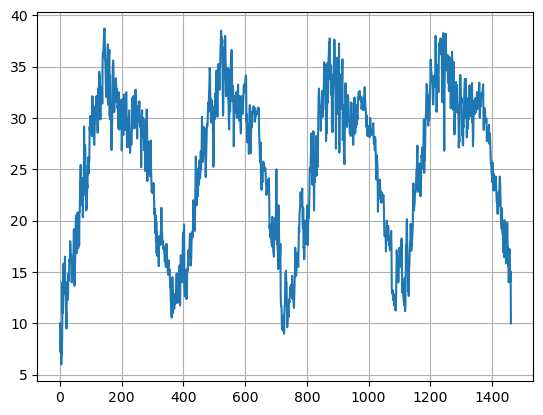

In [88]:
df['meantemp'].plot()
plt.grid()

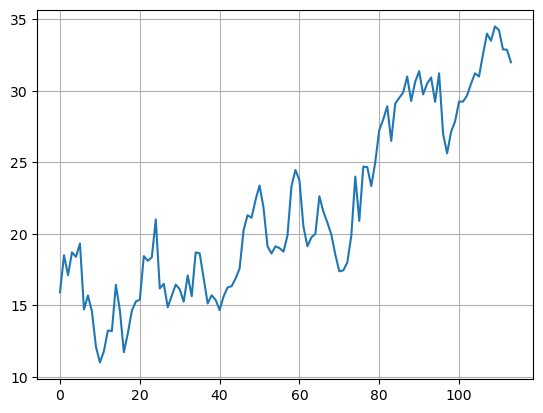

In [89]:
df_test['meantemp'].plot()
plt.grid()

<Axes: >

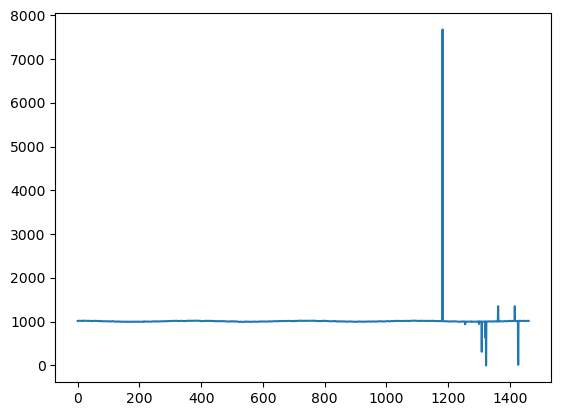

In [90]:
df['meanpressure'].plot()

<Axes: >

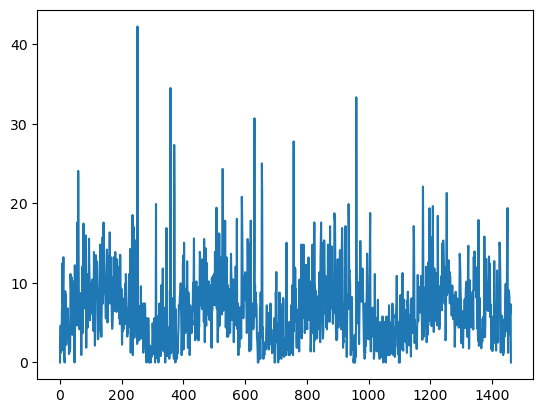

In [91]:
df['wind_speed'].plot()

<Axes: >

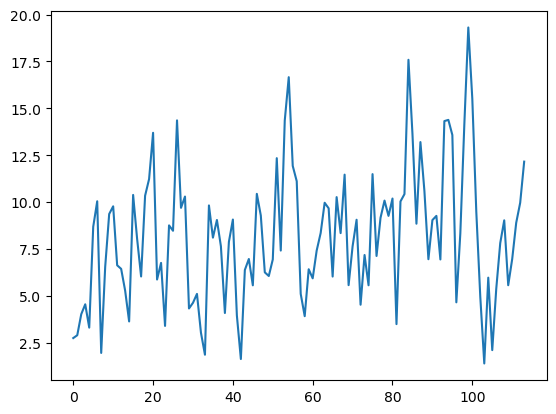

In [92]:
df_test['wind_speed'].plot()

In [93]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [94]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

The variance of the features are : 
meanpressure    32483.454272
humidity          281.221237
meantemp           53.994614
wind_speed         20.808214
dtype: float64


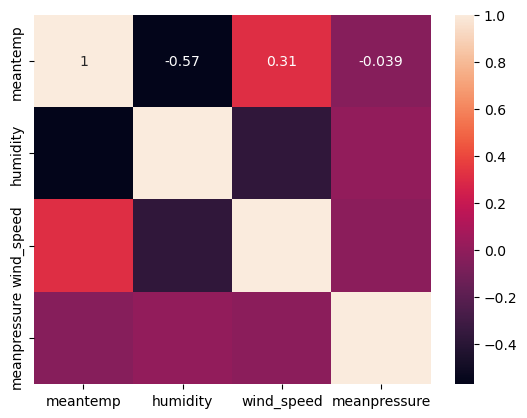

In [13]:
# Calculate the variance of the features 
variance = df.var().sort_values(ascending=False)
print(f'The variance of the features are : \n{variance}')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap to visualize the correlation matrix

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
df.head(1)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.0,84.5,0.0,1015.666667


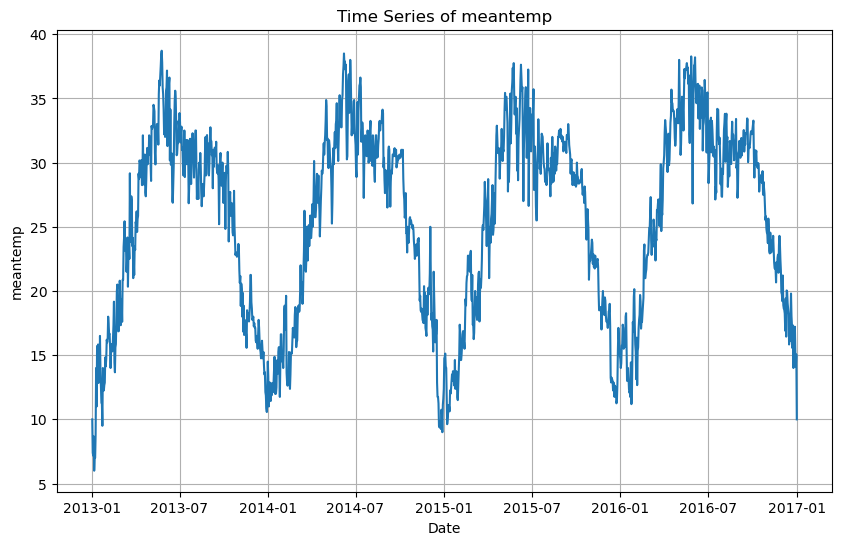

In [15]:
variance = 'meantemp'

# Plotting the selected feature
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[variance])
plt.title(f"Time Series of {variance}")
plt.xlabel('Date')
plt.ylabel(variance)
plt.grid()
plt.show()

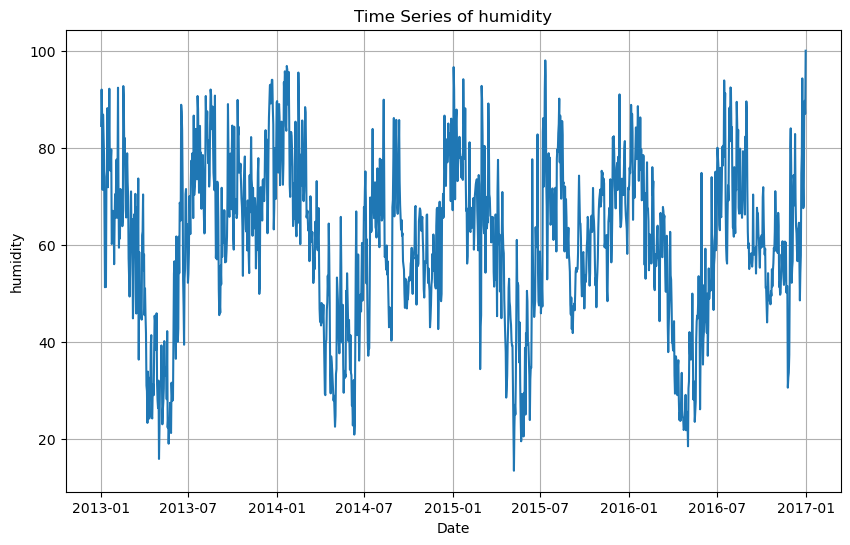

In [16]:
variance = 'humidity'

# Plotting the selected feature
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[variance])
plt.title(f"Time Series of {variance}")
plt.xlabel('Date')
plt.ylabel(variance)
plt.grid()
plt.show()

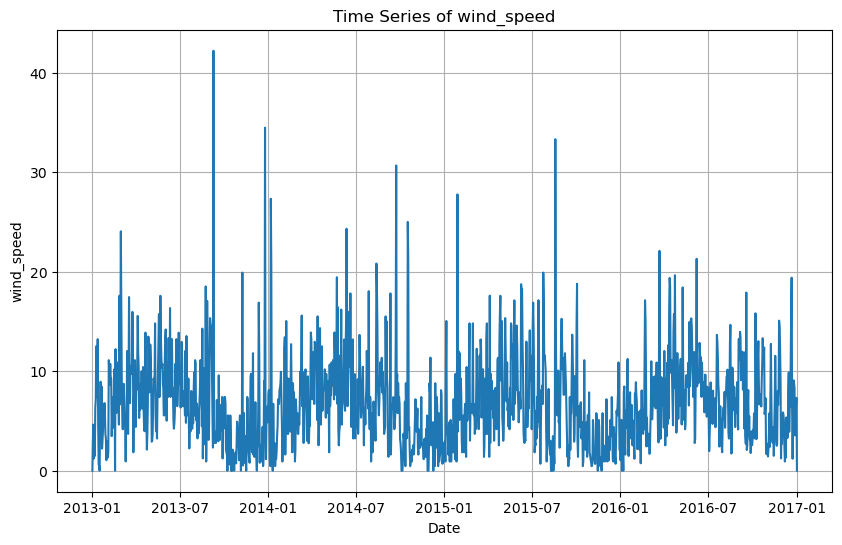

In [17]:
variance = 'wind_speed'

# Plotting the selected feature
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[variance])
plt.title(f"Time Series of {variance}")
plt.xlabel('Date')
plt.ylabel(variance)
plt.grid()
plt.show()

In [18]:
# Calculate the timestep frequency and convert to integer days
date_diffs = df.index.to_series().diff().dropna()
timestep = date_diffs.mode()[0].days  # Convert timedelta to integer days

print(f"The most common timestep in the dataset is: {timestep} days")

The most common timestep in the dataset is: 1 days


## LSTM Model Build and Train

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(timestep,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(125, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the architecture of the model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 125)               6375      
                                                                 
 dense_6 (Dense)             (None, 25)                3150      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 40151 (156.84 KB)
Trainable params: 40151 (156.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Convert data into numpy array
dataset = df['meantemp'].values.reshape(-1, 1)

In [45]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [46]:
# Split data into training and testing sets
training_size = int(len(dataset) * 0.8)
train_data, test_data = dataset[0:training_size, :], dataset[training_size:len(dataset), :]

In [47]:
# Prepare data for LSTM model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [48]:
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [49]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
37/37 [==============================] - 9s 54ms/step - loss: 0.1491 - val_loss: 0.0156
Epoch 2/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.0141
Epoch 3/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.0040
Epoch 4/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 7/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 8/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 11/50
37/37 

In [50]:
# Predictions and plotting
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [51]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

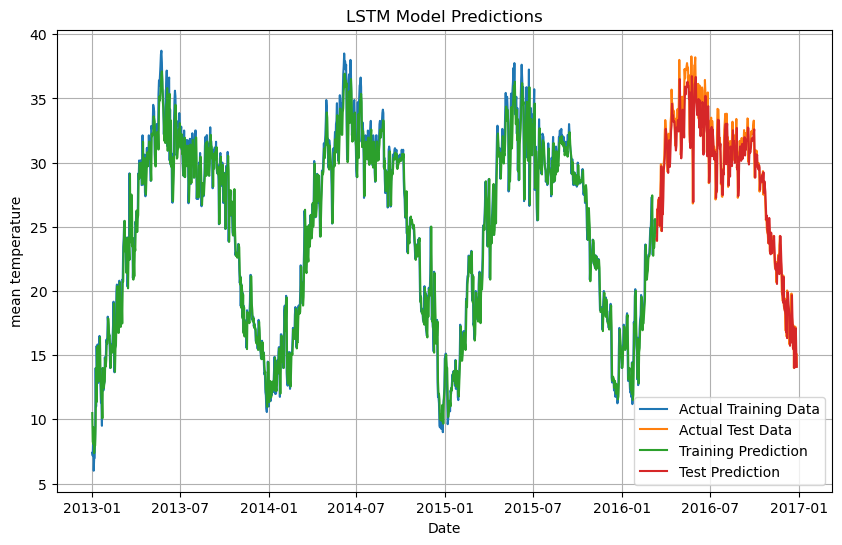

In [52]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df.index[:len(y_train)], y_train, label='Actual Training Data')
plt.plot(df.index[len(y_train):(len(y_train)+len(y_test))], y_test, label='Actual Test Data')
plt.plot(df.index[:len(train_predict)], train_predict, label='Training Prediction')
plt.plot(df.index[len(train_predict):(len(train_predict)+len(test_predict))], test_predict, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('mean temperature')
plt.title('LSTM Model Predictions')
plt.legend()
plt.grid()
plt.show()

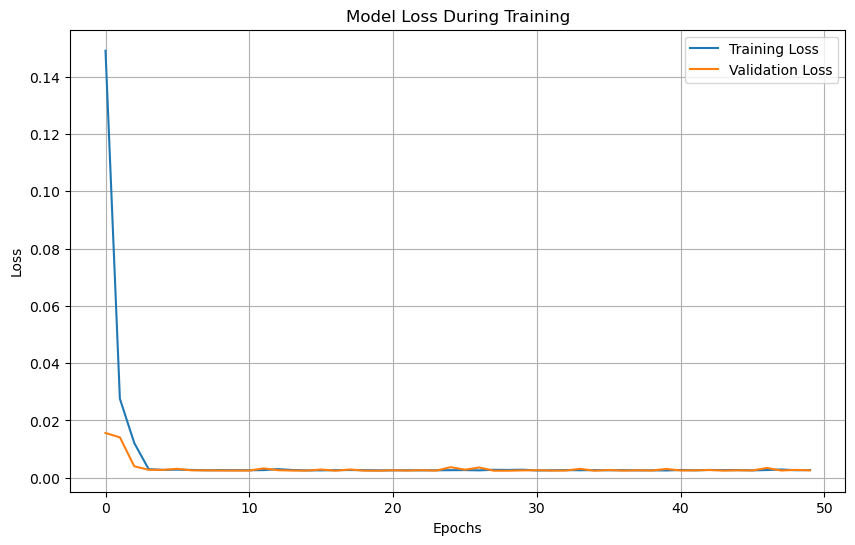

In [53]:

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.grid()
plt.show()

# Testing over unseen data

<Axes: xlabel='date'>

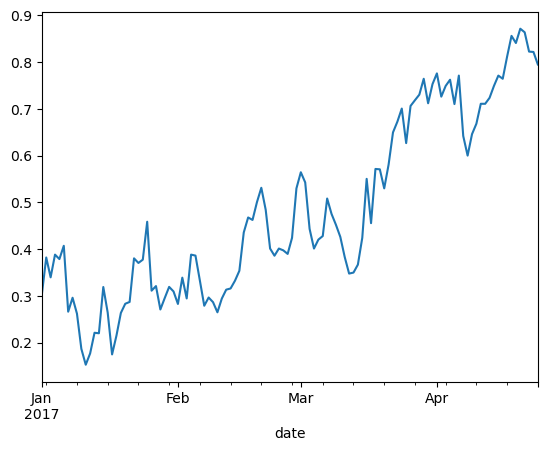

In [54]:
df_test['meantemp'].plot()

### Same Preprocessing

In [55]:
# date 
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace=True)

KeyError: 'date'

In [ ]:
# Scale the data using the same scaler as before
df_test['meantemp'] = scaler.transform(df_test[['meantemp']])

d:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [57]:
# Prepare the data for LSTM
unseen_data = df_test['meantemp'].values.reshape(-1, 1)
X_unseen, y_unseen = create_dataset(unseen_data, timestep)

# Reshape input to be [samples, time steps, features]
X_unseen = X_unseen.reshape(X_unseen.shape[0], X_unseen.shape[1], 1)

In [58]:

# Make predictions on the unseen data
unseen_predict = model.predict(X_unseen)

# Inverse transform the predictions and the actual data
unseen_predict = scaler.inverse_transform(unseen_predict)
y_unseen = scaler.inverse_transform(y_unseen.reshape(-1, 1))

4/4 [==============================] - 0s 6ms/step


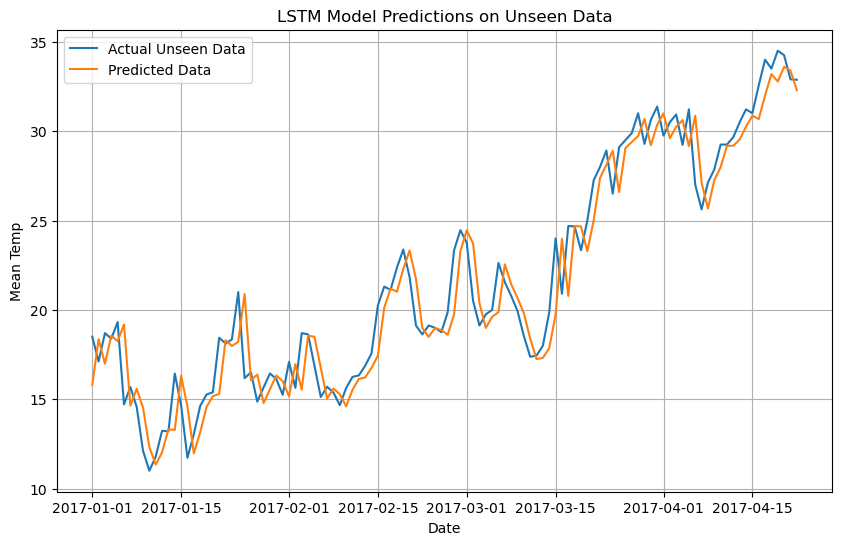

In [59]:

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df_test.index[:len(y_unseen)], y_unseen, label='Actual Unseen Data')
plt.plot(df_test.index[:len(unseen_predict)], unseen_predict, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.title('LSTM Model Predictions on Unseen Data')
plt.legend()
plt.grid()
plt.show()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Parameters
lookback_days = 90        # 3 months lookback for each prediction
forecast_days = 180       # 6 months to predict
iterations = 3            # Number of iteration cycles
window_size = 30          # Window size for LSTM input

# Assume df_test, scaler, and unseen_data are already defined from previous cells
# unseen_data is the scaled data, df_test contains the original test data

# Initialize lists to store all predictions and dates
all_predictions = []
all_pred_dates = []

# Start with the initial scaled data
current_data = unseen_data.copy()

# Assume the model is already trained; we'll retrain it in each iteration
def create_lstm_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(window_size, 1)),
        LSTM(50, activation='relu'),
        Dense(125, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [61]:
# Function to create sliding windows
def create_windowed(X, window_size):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i + window_size])
        ys.append(X[i + window_size])
    return np.array(Xs), np.array(ys)

In [63]:
# Iterative forecasting loop
for iteration in range(iterations):
    print(f"Iteration {iteration + 1}/{iterations}")

    # Prepare training data for the current iteration
    if len(current_data) < lookback_days:
        print("Not enough data for lookback. Stopping.")
        break

    # Create training windows
    X_train, y_train = create_windowed(current_data[-lookback_days:], window_size)
    
    if X_train.shape[0] == 0:
        print("No training windows created. Check data length or window size.")
        break

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # Train or retrain the model
    model = model
    model.fit(X_train, y_train, epochs=20, verbose=0)

    # Forecast next 6 months
    prediction_input = current_data[-window_size:].reshape(1, window_size, 1)
    monthly_preds = []

    for _ in range(forecast_days):
        pred = model.predict(prediction_input, verbose=0)
        monthly_preds.append(pred[0, 0])
        
        pred_reshaped = pred.reshape(1, 1, 1)
        prediction_input = np.concatenate((prediction_input[:, 1:, :], pred_reshaped), axis=1)

    # Store predictions
    monthly_preds = np.array(monthly_preds).reshape(-1, 1)
    all_predictions.extend(monthly_preds)

    # Generate dates for the predictions
    last_date = df_test.index[-1] if iteration == 0 else all_pred_dates[-1]
    pred_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    all_pred_dates.extend(pred_dates)

    # Append predictions to current_data for the next iteration
    current_data = np.concatenate((current_data, monthly_preds), axis=0)

Iteration 1/3
Iteration 2/3
Iteration 3/3


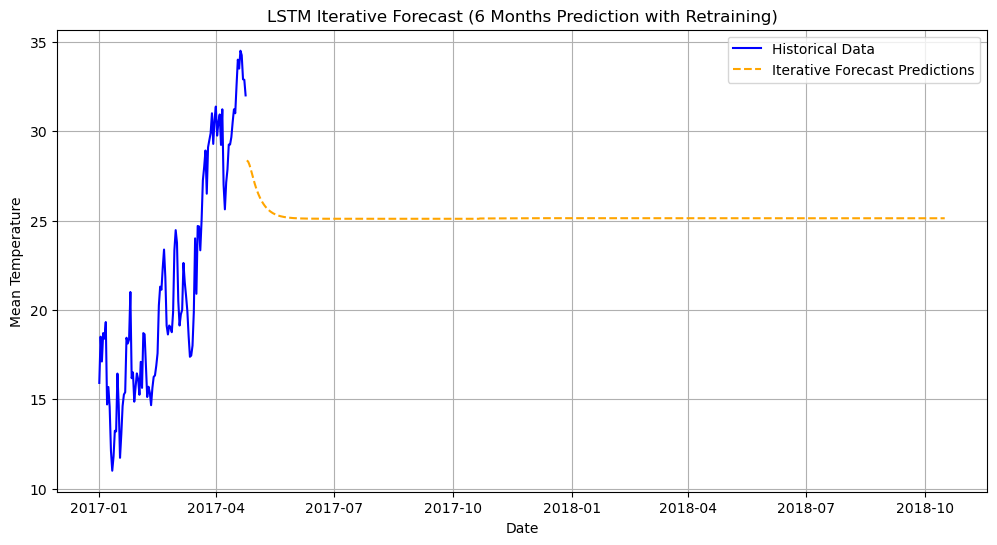

In [64]:
# Inverse transform and plot results
if all_predictions:
    all_predictions = scaler.inverse_transform(np.array(all_predictions).reshape(-1, 1))
    forecast_df = pd.DataFrame(all_predictions, index=all_pred_dates, columns=['meantemp'])

    plt.figure(figsize=(12, 6))
    plt.plot(df_test.index, scaler.inverse_transform(unseen_data), label='Historical Data', color='blue')
    plt.plot(forecast_df.index, forecast_df['meantemp'], label='Iterative Forecast Predictions', linestyle='--', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.title('LSTM Iterative Forecast (6 Months Prediction with Retraining)')
    plt.legend()
    plt.grid()
    plt.savefig('iterative_forecast.png')
else:
    print("No predictions generated. Check data length or parameters.")

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Parameters
lookback_days = 365       # 1 year lookback to capture seasonality
forecast_days = 180       # 6 months to predict
iterations = 3            # Number of iteration cycles
window_size = 60          # Window size for LSTM input (2 months)

# Prepare the data with all features
df_test['month'] = df_test['date'].apply(lambda x: pd.to_datetime(x).month)  # Add month as a feature
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'month']
data = df_test[features].values

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Initialize lists to store all predictions and dates
all_predictions = []
all_pred_dates = []

# Start with the initial scaled data
current_data = scaled_data.copy()

# Define the LSTM model
def create_lstm_model(window_size, n_features):
    model = Sequential([
        LSTM(100, activation='relu', input_shape=(window_size, n_features), return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(25),
        Dense(1)  # Predict only meantemp
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to create sliding windows for multivariate data
def create_windowed(X, window_size, n_features):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i + window_size])
        ys.append(X[i + window_size, 0])  # Predict meantemp only
    return np.array(Xs), np.array(ys)

# Iterative forecasting loop
n_features = len(features)
for iteration in range(iterations):
    print(f"Iteration {iteration + 1}/{iterations}")

    # Prepare training data for the current iteration
    if len(current_data) < lookback_days:
        print("Not enough data for lookback. Stopping.")
        break

    # Create training windows
    X_train, y_train = create_windowed(current_data[-lookback_days:], window_size, n_features)
    
    if X_train.shape[0] == 0:
        print("No training windows created. Check data length or window size.")
        break

    # Train or retrain the model
    model = create_lstm_model(window_size, n_features)
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Forecast next 6 months
    prediction_input = current_data[-window_size:].reshape(1, window_size, n_features)
    monthly_preds = []

    for day in range(forecast_days):
        # Predict the next day's meantemp
        pred = model.predict(prediction_input, verbose=0)
        monthly_preds.append(pred[0, 0])

        # Prepare the next input
        # Shift the window and add the new prediction
        new_input = np.zeros((1, 1, n_features))
        new_input[0, 0, 0] = pred[0, 0]  # Set meantemp prediction

        # Carry over the other features (humidity, wind_speed, meanpressure) from the last known values
        new_input[0, 0, 1:4] = prediction_input[0, -1, 1:4]

        # Calculate the month for the new day
        last_date = df_test['date'].iloc[-1] if iteration == 0 and day == 0 else all_pred_dates[-1]
        new_date = pd.to_datetime(last_date) + pd.Timedelta(days=1)
        new_input[0, 0, 4] = scaler.fit_transform([[1], [12]])[new_date.month - 1][0]  # Scale month between 0 and 1

        # Update prediction input
        prediction_input = np.concatenate((prediction_input[:, 1:, :], new_input), axis=1)

    # Store predictions
    monthly_preds = np.array(monthly_preds).reshape(-1, 1)
    all_predictions.extend(monthly_preds)

    # Generate dates for the predictions
    last_date = pd.to_datetime(df_test['date'].iloc[-1]) if iteration == 0 else all_pred_dates[-1]
    pred_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    all_pred_dates.extend(pred_dates)

    # Prepare the data to append (need to create full feature set)
    appended_data = np.zeros((forecast_days, n_features))
    appended_data[:, 0] = monthly_preds.flatten()  # Set meantemp predictions
    # Use the last known values for other features
    for i in range(forecast_days):
        appended_data[i, 1:4] = current_data[-1, 1:4]  # Copy humidity, wind_speed, meanpressure
        appended_data[i, 4] = scaler.fit_transform([[1], [12]])[pred_dates[i].month - 1][0]  # Set month

    # Append predictions to current_data for the next iteration
    current_data = np.concatenate((current_data, appended_data), axis=0)

# Inverse transform and plot results
if all_predictions:
    # Prepare a dummy array for inverse transform (only meantemp matters)
    dummy_array = np.zeros((len(all_predictions), n_features))
    dummy_array[:, 0] = np.array(all_predictions).flatten()
    all_predictions_transformed = scaler.inverse_transform(dummy_array)[:, 0]

    forecast_df = pd.DataFrame(all_predictions_transformed, index=all_pred_dates, columns=['meantemp'])

    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df_test['date']), df_test['meantemp'], label='Historical Data', color='blue')
    plt.plot(forecast_df.index, forecast_df['meantemp'], label='Iterative Forecast Predictions', linestyle='--', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.title('Improved LSTM Iterative Forecast (6 Months Prediction with Retraining)')
    plt.legend()
    plt.grid()
    plt.savefig('improved_iterative_forecast.png')
else:
    print("No predictions generated. Check data length or parameters.")

Iteration 1/3
Not enough data for lookback. Stopping.
No predictions generated. Check data length or parameters.


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Parameters
lookback_days = 90        # Reduced to fit test dataset
forecast_days = 180       # 6 months to predict
iterations = 3            # Number of iteration cycles
window_size = 60          # Window size for LSTM input (2 months)

# Prepare the data with all features
df_test = pd.read_csv(os.path.join(path, "DailyDelhiClimateTest.csv"))
df_test['month'] = df_test['date'].apply(lambda x: pd.to_datetime(x).month)  # Add month as a feature
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'month']
data = df_test[features].values

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Precompute month scaler
month_scaler = MinMaxScaler()
month_scaler.fit(np.array([[1], [12]]))  # Fit for months 1 to 12

# Initialize lists to store all predictions and dates
all_predictions = []
all_pred_dates = []

# Start with the initial scaled data
current_data = scaled_data.copy()

# Define the LSTM model
def create_lstm_model(window_size, n_features):
    model = Sequential([
        LSTM(100, activation='relu', input_shape=(window_size, n_features), return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(25),
        Dense(1)  # Predict only meantemp
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to create sliding windows for multivariate data
def create_windowed(X, window_size, n_features):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i + window_size])
        ys.append(X[i + window_size, 0])  # Predict meantemp only
    return np.array(Xs), np.array(ys)

# Iterative forecasting loop
n_features = len(features)
for iteration in range(iterations):
    print(f"Iteration {iteration + 1}/{iterations}")

    # Prepare training data for the current iteration
    if len(current_data) < lookback_days:
        print("Not enough data for lookback. Stopping.")
        break

    # Create training windows
    X_train, y_train = create_windowed(current_data[-lookback_days:], window_size, n_features)
    
    if X_train.shape[0] == 0:
        print("No training windows created. Check data length or window size.")
        break

    # Train or retrain the model
    model = create_lstm_model(window_size, n_features)
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Forecast next 6 months
    prediction_input = current_data[-window_size:].reshape(1, window_size, n_features)
    monthly_preds = []

    for day in range(forecast_days):
        # Predict the next day's meantemp
        pred = model.predict(prediction_input, verbose=0)
        monthly_preds.append(pred[0, 0])

        # Prepare the next input
        new_input = np.zeros((1, 1, n_features))
        new_input[0, 0, 0] = pred[0, 0]  # Set meantemp prediction
        new_input[0, 0, 1:4] = prediction_input[0, -1, 1:4]  # Carry over other features

        # Calculate the month for the new day
        last_date = df_test['date'].iloc[-1] if iteration == 0 and day == 0 else all_pred_dates[-1]
        new_date = pd.to_datetime(last_date) + pd.Timedelta(days=1)
        new_input[0, 0, 4] = month_scaler.transform([[new_date.month]])[0, 0]  # Scaled month

        # Update prediction input
        prediction_input = np.concatenate((prediction_input[:, 1:, :], new_input), axis=1)

    # Store predictions
    monthly_preds = np.array(monthly_preds).reshape(-1, 1)
    all_predictions.extend(monthly_preds)

    # Generate dates for the predictions
    last_date = pd.to_datetime(df_test['date'].iloc[-1]) if iteration == 0 else all_pred_dates[-1]
    pred_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    all_pred_dates.extend(pred_dates)

    # Prepare the data to append
    appended_data = np.zeros((forecast_days, n_features))
    appended_data[:, 0] = monthly_preds.flatten()  # Set meantemp predictions
    for i in range(forecast_days):
        appended_data[i, 1:4] = current_data[-1, 1:4]  # Copy humidity, wind_speed, meanpressure
        appended_data[i, 4] = month_scaler.transform([[pred_dates[i].month]])[0, 0]  # Set month

    # Append predictions to current_data for the next iteration
    current_data = np.concatenate((current_data, appended_data), axis=0)

# Inverse transform and plot results
if all_predictions:
    # Prepare a dummy array for inverse transform (only meantemp matters)
    dummy_array = np.zeros((len(all_predictions), n_features))
    dummy_array[:, 0] = np.array(all_predictions).flatten()
    all_predictions_transformed = scaler.inverse_transform(dummy_array)[:, 0]

    forecast_df = pd.DataFrame(all_predictions_transformed, index=all_pred_dates, columns=['meantemp'])

    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df_test['date']), df_test['meantemp'], label='Historical Data', color='blue')
    plt.plot(forecast_df.index, forecast_df['meantemp'], label='Iterative Forecast Predictions', linestyle='--', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature')
    plt.title('Improved LSTM Iterative Forecast (6 Months Prediction with Retraining)')
    plt.legend()
    plt.grid()
    plt.savefig('improved_iterative_forecast.png')
    plt.show()
else:
    print("No predictions generated. Check data length or parameters.")

Iteration 1/3


IndexError: list index out of range